##**Import libraries**##

In [2]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00


In [3]:
import torch

In [4]:
torch.__version__

'2.4.1+cu121'

In [5]:
!pip install pyg-lib -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.4.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 52.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 55.5 MB/s eta 0:00:00


In [6]:
# Setting Device

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

Device: cuda


##**Import Data**##

In [6]:
import zipfile
import os

# Extract SC_DNA_adj.zip
with zipfile.ZipFile('SC_DNA_adj.zip', 'r') as zip_ref:
    zip_ref.extractall('SC_DNA_adj')

# Extract SC_ESS.zip
with zipfile.ZipFile('SC_ESS.zip', 'r') as zip_ref:
    zip_ref.extractall('SC_ESS')

In [12]:
# Check if the files were extracted
print("SC_DNA_adj contents:", os.listdir('SC_DNA_adj/SC_DNA_adj')[:5])  # Show the first 5 files
print("SC_ESS contents:", os.listdir('SC_ESS'))

SC_DNA_adj contents: ['YBL045C .csv', 'YKR034W .csv', 'YAR007C .csv', 'YPR005C .csv', 'YMR219W .csv']
SC_ESS contents: ['SC_ESS']


In [21]:
import pandas as pd
import numpy as np

# Load one example gene adjacency matrix (choose a specific gene CSV)
example_gene_csv = 'SC_DNA_adj/SC_DNA_adj/YBL011W .csv'
adj_matrix = pd.read_csv(example_gene_csv, header=None)

print(f"Adjacency matrix for {example_gene_csv}:")

Adjacency matrix for SC_DNA_adj/SC_DNA_adj/YBL011W .csv:


In [22]:
print(adj_matrix.head())  # Show the first few rows

     0      1      2      3      4      5      6      7      8      9    ...  \
0    NaN  AAAAA  CAAAA  GAAAA  TAAAA  AAAAC  AAAAG  AAAAT  AAACA  TAAAC  ...   
1  AAAAA      6      0      0      0      8      6      6      0      0  ...   
2  CAAAA      8      0      0      0      8      6      6      0      0  ...   
3  GAAAA      8      0      0      0      8      6      6      0      0  ...   
4  TAAAA      8      0      0      0      8      0      6      0      0  ...   

     857    858    859    860    861    862    863    864    865    866  
0  TTTCG  TTTCT  TTTGA  TTTGC  TTTGG  TTTGT  TTTTA  TTTTC  TTTTG  TTTTT  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 867 columns]


In [23]:
# Load the SC_ESS.csv file
sc_ess_df = pd.read_csv('SC_ESS/SC_ESS/SC_ESS.csv')

# Inspect the essentiality file
print("SC_ESS file preview:")
print(sc_ess_df.head())  # Show the first few rows

SC_ESS file preview:
      Gene Essential CEG
0  YJL074C     Essential
1  YOR151C     Essential
2  YKL173W     Essential
3  YJR064W     Essential
4  YPL235W     Essential


In [24]:
print(sc_ess_df['Essential CEG'].value_counts())  # Count essential vs non-essential

Essential CEG
Non-essential    4373
Essential        1036
Name: count, dtype: int64


##**Creating graph for a single csv file**##

In [25]:
example_gene_csv = 'SC_DNA_adj/SC_DNA_adj/YBL011W .csv'
df = pd.read_csv(example_gene_csv, header=None)
nodes = df.iloc[0, 1:].values
adj_matrix = df.iloc[1:, 1:].values.astype(int)

# Create a dictionary to map node labels to numerical indices
node_mapping = {node: i for i, node in enumerate(nodes)}

import networkx as nx

# Create a NetworkX graph from the adjacency matrix, using numerical indices for nodes
G = nx.from_numpy_array(adj_matrix, node_mapping)

In [37]:
G.degree[0]

8

##**Working on Alaki data**##

In [24]:
import numpy as np

nodes_alaki = np.array(["aaaaa", "bbbbb", "ccccc", "ddddd"])
adj_matrix_alaki = np.array([[4, 6, 0, 2],
                             [1, 0, 2, 5],
                             [0, 6, 0, 0],
                             [3, 3, 0, 6]])

In [25]:
node_mapping_alaki = {node: i for i, node in enumerate(nodes_alaki)}

In [26]:
import networkx as nx

# Create a NetworkX graph from the adjacency matrix, using numerical indices for nodes
#Graph_alaki = nx.from_numpy_array(adj_matrix_alaki, node_mapping_alaki)

Graph_alaki = nx.from_numpy_array(adj_matrix_alaki)
Graph_alaki = nx.relabel_nodes(Graph_alaki, node_mapping_alaki)

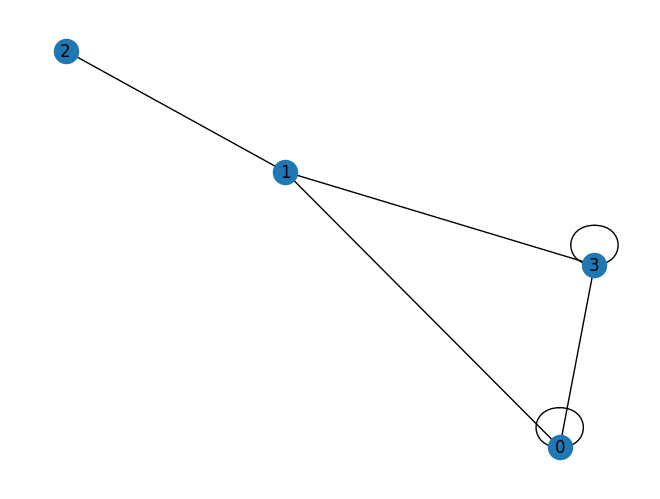

In [27]:
nx.draw(Graph_alaki, with_labels=True)

In [28]:
Graph_alaki.nodes

NodeView((0, 1, 2, 3))

In [29]:
Graph_alaki.edges

EdgeView([(0, 0), (0, 1), (0, 3), (1, 2), (1, 3), (3, 3)])

In [30]:
import torch

# Get the edge list as a tensor
edge_index_alaki = torch.tensor(list(Graph_alaki.edges)).t().contiguous()

In [31]:
edge_index_alaki

tensor([[0, 0, 0, 1, 1, 3],
        [0, 1, 3, 2, 3, 3]])

In [32]:
Graph_alaki.graph['edge_index_alaki'] = edge_index_alaki

In [33]:
Graph_alaki.nodes

NodeView((0, 1, 2, 3))

In [34]:
for node in Graph_alaki.nodes:
  print(f'Degree of node {node} is {Graph_alaki.degree(node)}')

Degree of node 0 is 4
Degree of node 1 is 3
Degree of node 2 is 1
Degree of node 3 is 4


##**Working on several csv files**##

In [45]:
import pandas as pd
import networkx as nx
import torch
import os

# Load SC_ESS.csv to get gene essentiality
sc_ess_df = pd.read_csv('SC_ESS/SC_ESS/SC_ESS.csv')

# Function to construct a graph for each gene CSV and assign edge_index, x, and y attributes
def construct_graph(gene_csv, sc_ess_df):
    # Load the gene adjacency matrix CSV
    df = pd.read_csv(gene_csv, header=None)

    # Extract nodes (5-mers of DNA sequence) and adjacency matrix
    nodes = df.iloc[0, 1:].values  # First row (excluding the first column)
    adj_matrix = df.iloc[1:, 1:].values.astype(int)  # Adjacency matrix

    # Create a dictionary to map node labels to numerical indices
    node_mapping = {node: i for i, node in enumerate(nodes)}

    # Create a NetworkX graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)

    # Get the edge list as a tensor for PyTorch Geometric
    edge_index = torch.tensor(list(G.edges)).t().contiguous()  # Transpose and make contiguous
    G.graph['edge_index'] = edge_index

    # Calculate the degree of each node and use it as a feature
    degrees = [G.degree(node) for node in G.nodes]
    degree_features = torch.tensor(degrees, dtype=torch.float32).view(-1, 1)  # Reshape to (num_nodes, 1)
    G.graph['x'] = degree_features

    # Extract gene name from the file name
    gene_name = os.path.basename(gene_csv).replace(' .csv', '')

    # Check the essentiality from SC_ESS.csv
    gene_ess_row = sc_ess_df[sc_ess_df['Gene'] == gene_name]

    if not gene_ess_row.empty:
        # If the gene is essential, set y to 1, otherwise to 0
        if gene_ess_row['Essential CEG'].values[0] == 'Essential':
            G.graph['y'] = torch.tensor([1])
        else:
            G.graph['y'] = torch.tensor([0])
    else:
        # If the gene is not found, raise an error
        raise ValueError(f"Gene {gene_name} not found in SC_ESS.csv")

    return G

In [46]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

# Example usage for a single gene CSV
example_gene_csv = 'SC_DNA_adj/SC_DNA_adj/YMR125W .csv'
G = construct_graph(example_gene_csv, sc_ess_df)

# Inspect the created graph's attributes
print("Edge Index:")
print(G.graph['edge_index'])

print("Node Features (x):")
print(G.graph['x'])

print("Graph Label (y):")
print(G.graph['y'])

<IPython.core.display.Javascript object>

Edge Index:
tensor([[  0,   0,   0,  ..., 824, 825, 826],
        [  0,   4,   5,  ..., 826, 826, 826]])
Node Features (x):
tensor([[8.],
        [7.],
        [8.],
        [8.],
        [7.],
        [7.],
        [7.],
        [8.],
        [6.],
        [7.],
        [6.],
        [7.],
        [6.],
        [8.],
        [7.],
        [6.],
        [6.],
        [5.],
        [5.],
        [4.],
        [7.],
        [6.],
        [6.],
        [7.],
        [5.],
        [2.],
        [5.],
        [7.],
        [7.],
        [5.],
        [5.],
        [2.],
        [7.],
        [5.],
        [5.],
        [7.],
        [4.],
        [5.],
        [5.],
        [5.],
        [2.],
        [6.],
        [5.],
        [4.],
        [4.],
        [5.],
        [5.],
        [7.],
        [2.],
        [6.],
        [4.],
        [6.],
        [4.],
        [5.],
        [6.],
        [6.],
        [8.],
        [7.],
        [8.],
        [4.],
        [6.],
        [8.],
        

In [47]:
# List all CSV files in SC_DNA_adj directory
adj_dir = 'SC_DNA_adj/SC_DNA_adj'
gene_csvs = [os.path.join(adj_dir, file) for file in os.listdir(adj_dir) if file.endswith('.csv')]

# Construct graph for each gene
graphs = []
for gene_csv in gene_csvs:
    try:
        G = construct_graph(gene_csv, sc_ess_df)
        graphs.append(G)
    except ValueError as e:
        print(e)  # If a gene is not found in SC_ESS.csv, handle the exception

Gene YJR135C not found in SC_ESS.csv
Gene YCR024C-A not found in SC_ESS.csv
Gene YFL002W-A not found in SC_ESS.csv
Gene YHR214C-B not found in SC_ESS.csv
Gene YOR343W-A not found in SC_ESS.csv
Gene YDR365W-B not found in SC_ESS.csv
Gene YDR098C-B not found in SC_ESS.csv
Gene YJR049C not found in SC_ESS.csv
Gene YAR010C not found in SC_ESS.csv
Gene Q0080 not found in SC_ESS.csv
Gene YOR192C-B not found in SC_ESS.csv
Gene YJL184W not found in SC_ESS.csv
Gene YML039W not found in SC_ESS.csv
Gene YKR075C not found in SC_ESS.csv
Gene YOL103W-B not found in SC_ESS.csv
Gene YBR296C-A not found in SC_ESS.csv
Gene YOL103W-A not found in SC_ESS.csv
Gene YBL100W-B not found in SC_ESS.csv
Gene YGR109W-A not found in SC_ESS.csv
Gene YDR316W-A not found in SC_ESS.csv
Gene YMR272W-B not found in SC_ESS.csv
Gene YGL236C not found in SC_ESS.csv
Gene YDR261W-B not found in SC_ESS.csv
Gene YPR158C-D not found in SC_ESS.csv
Gene YBL071C-B not found in SC_ESS.csv
Gene YOR293C-A not found in SC_ESS.csv
Gene

In [48]:
len(graphs)

5409

In [49]:
graphs[0]

In [50]:
graphs[0].graph['y']

tensor([0])

In [51]:
from torch_geometric.data import Data
import torch

def convert_nx_to_pyg(G):
    # Convert edge list to edge_index tensor
    edge_index = G.graph['edge_index']

    # Get node features (x)
    x = G.graph['x']

    # Get label (y)
    y = G.graph['y']

    # Create a PyG Data object
    pyg_data = Data(x=x, edge_index=edge_index, y=y)

    return pyg_data

# Convert all NetworkX graphs to PyG Data objects
pyg_graphs = [convert_nx_to_pyg(G) for G in graphs]

/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [52]:
pyg_graphs[0]

Data(x=[670, 1], edge_index=[2, 1070], y=[1])

In [54]:
pyg_graphs[0].x

tensor([[4.],
        [5.],
        [5.],
        [7.],
        [3.],
        [2.],
        [6.],
        [6.],
        [4.],
        [5.],
        [4.],
        [4.],
        [4.],
        [5.],
        [3.],
        [6.],
        [5.],
        [4.],
        [5.],
        [2.],
        [8.],
        [6.],
        [5.],
        [2.],
        [2.],
        [4.],
        [4.],
        [7.],
        [3.],
        [3.],
        [6.],
        [2.],
        [4.],
        [2.],
        [4.],
        [4.],
        [5.],
        [4.],
        [4.],
        [4.],
        [4.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [6.],
        [5.],
        [4.],
        [4.],
        [2.],
        [4.],
        [5.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [7.],
        [6.],
        [2.],
        [4.],
        [4.],
        [5.],
        [2.],
        [7.],
        [2.],
        [2.],
        [7.],
        [2.],
        [2.],
      

In [55]:
pyg_graphs[0].y

tensor([0])

##**Split dataset into training, validation, and test sets**##

In [56]:
from torch_geometric.data import DataLoader
from sklearn.model_selection import train_test_split

# Split the pyg_graphs dataset into training, validation, and test sets
train_graphs, temp_graphs = train_test_split(pyg_graphs, test_size=0.3, random_state=42)  # 70% train, 30% temp
valid_graphs, test_graphs = train_test_split(temp_graphs, test_size=0.5, random_state=42)  # Split temp into 15% valid, 15% test

In [57]:
# Display the size of each split
print(f'Training graphs: {len(train_graphs)}')
print(f'Validation graphs: {len(valid_graphs)}')
print(f'Test graphs: {len(test_graphs)}')

Training graphs: 3786
Validation graphs: 811
Test graphs: 812


In [58]:
# Load the data sets into DataLoader
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_graphs, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False, num_workers=0)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [59]:
# Print an example from the DataLoader to check
for batch in train_loader:
    print(batch)
    break

DataBatch(x=[19970, 1], edge_index=[2, 35321], y=[32], batch=[19970], ptr=[33])


In [60]:
i = 0
li = []
for batch in train_loader:
  li.append(batch)
  i += 1

In [61]:
print(i)
print(li[0])
print(li[100])
print(li[0].x)
print(li[0].batch)

119
DataBatch(x=[18265, 1], edge_index=[2, 30979], y=[32], batch=[18265], ptr=[33])
DataBatch(x=[18792, 1], edge_index=[2, 30955], y=[32], batch=[18792], ptr=[33])
tensor([[8.],
        [4.],
        [8.],
        ...,
        [5.],
        [8.],
        [8.]])
tensor([ 0,  0,  0,  ..., 31, 31, 31])


##**Graph Prediction Model**##

In [62]:
# Importing Libraries
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import DataLoader
import copy

In [63]:
# Setting Device

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

Device: cuda


In [64]:
# Define model parameters
args = {
    'device': device,
    'num_layers': 3,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.001,
    'epochs': 30,
}
args

{'device': 'cuda',
 'num_layers': 3,
 'hidden_dim': 256,
 'dropout': 0.5,
 'lr': 0.001,
 'epochs': 30}

In [65]:
# GCN class for the graph
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout, return_embeds=False):
        super(GCN, self).__init__()

        self.convs = torch.nn.ModuleList()
        self.convs.append(GCNConv(input_dim, hidden_dim))

        for _ in range(num_layers - 2):
            self.convs.append(GCNConv(hidden_dim, hidden_dim))
        self.convs.append(GCNConv(hidden_dim, output_dim))

        self.bns = torch.nn.ModuleList([torch.nn.BatchNorm1d(hidden_dim) for _ in range(num_layers - 1)])
        self.softmax = torch.nn.LogSoftmax(dim=1)
        self.dropout = dropout
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs[:-1]):
            x = conv(x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

        x = self.convs[-1](x, edge_index)

        if not self.return_embeds:
            x = self.softmax(x)

        return x

In [66]:
# GCN for graph-level classification
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()

        # Node embedding model
        self.gnn_node = GCN(input_dim=1, hidden_dim=hidden_dim, output_dim=hidden_dim, num_layers=num_layers, dropout=dropout, return_embeds=True)

        # Global pooling layer
        self.pool = global_mean_pool

        # Linear layer for graph classification
        self.linear = torch.nn.Linear(hidden_dim, output_dim)

    def reset_parameters(self):
        self.gnn_node.reset_parameters()
        self.linear.reset_parameters()

    def forward(self, batched_data):
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch

        # Generate node embeddings using GCN
        node_embeds = self.gnn_node(x, edge_index)

        # Aggregate node embeddings into graph embeddings
        graph_embeds = self.pool(node_embeds, batch)

        # Predict graph-level property (essential or non-essential)
        out = self.linear(graph_embeds)

        # Reshape output to be [batch_size] instead of [batch_size, 1]
        return out.view(-1)

In [67]:
# Training function
def train(model, device, data_loader, optimizer, loss_fn):
    model.train()
    total_loss = 0

    for step, batch in enumerate(data_loader):
        batch = batch.to(device)

        # Skip graphs with no nodes
        if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
            continue

        # Ignore NaN targets
        is_labeled = batch.y == batch.y

        optimizer.zero_grad()
        out = model(batch)

        # Compute loss for labeled data
        loss = loss_fn(out[is_labeled], batch.y[is_labeled].float())

        # Backpropagation
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

In [68]:
# Evaluation function
def eval(model, device, loader):
    model.eval()
    y_true = []
    y_pred = []

    for step, batch in enumerate(loader):
        batch = batch.to(device)

        if batch.x.shape[0] == 1:
            continue

        with torch.no_grad():
            pred = model(batch)

        y_true.append(batch.y.view(pred.shape).detach().cpu())
        y_pred.append(pred.detach().cpu())

    y_true = torch.cat(y_true, dim=0).numpy()
    y_pred = torch.cat(y_pred, dim=0).numpy()

    # Binarize predictions (logits -> probabilities -> binary)
    y_pred = (torch.sigmoid(torch.tensor(y_pred)) > 0.5).numpy()

    accuracy = (y_pred == y_true).mean()
    return accuracy

In [69]:
# Instantiate the model, optimizer, and loss function
model = GCN_Graph(args['hidden_dim'], output_dim=1, num_layers=args['num_layers'], dropout=args['dropout']).to(device)

In [70]:
import copy

model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.BCEWithLogitsLoss()

best_model = None
best_valid_acc = 0

# Training loop
for epoch in range(1, args['epochs'] + 1):
    print(f'Epoch {epoch}:')

    # Train the model
    train_loss = train(model, device, train_loader, optimizer, loss_fn)
    print(f'Training loss: {train_loss:.4f}')

    # Evaluate on validation and test sets
    train_acc = eval(model, device, train_loader)
    valid_acc = eval(model, device, valid_loader)
    test_acc = eval(model, device, test_loader)

    print(f'Train Acc: {train_acc:.4f}, Valid Acc: {valid_acc:.4f}, Test Acc: {test_acc:.4f}')

    # Save best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)

Epoch 1:
Training loss: 0.5068
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8030
Epoch 2:
Training loss: 0.4997
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8030
Epoch 3:
Training loss: 0.4942
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8030
Epoch 4:
Training loss: 0.4925
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8030
Epoch 5:
Training loss: 0.4927
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8030
Epoch 6:
Training loss: 0.4924
Train Acc: 0.8040, Valid Acc: 0.8212, Test Acc: 0.8054
Epoch 7:
Training loss: 0.4920
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8030
Epoch 8:
Training loss: 0.4943
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8030
Epoch 9:
Training loss: 0.4919
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8042
Epoch 10:
Training loss: 0.4943
Train Acc: 0.8040, Valid Acc: 0.8200, Test Acc: 0.8042
Epoch 11:
Training loss: 0.4940
Train Acc: 0.8067, Valid Acc: 0.8224, Test Acc: 0.8030
Epoch 12:
Training loss: 0.4924
Train Acc: 0.8067, V

In [ ]:
# Evaluate best model
train_acc = eval(best_model, device, train_loader)
valid_acc = eval(best_model, device, valid_loader)
test_acc = eval(best_model, device, test_loader)

print(f'Best Model - Train Acc: {train_acc:.4f}, Valid Acc: {valid_acc:.4f}, Test Acc: {test_acc:.4f}')


Best Model - Train Acc: 0.8111, Valid Acc: 0.8076, Test Acc: 0.7968


In [ ]:
print(len(train_loader.dataset), len(valid_loader.dataset), len(test_loader.dataset))


3786 811 812


In [ ]:
for step, batch in enumerate(train_loader):
    batch = batch.to(device)
    out = model(batch)
    print(out[:5])  # Check a few outputs
    print(batch.y[:5])  # Check corresponding ground truth
    break


tensor([-1.7971, -1.7977, -1.1837, -1.4539, -1.8428], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([1, 0, 1, 0, 0], device='cuda:0')


In [ ]:
for step, batch in enumerate(train_loader):
    print(batch.x[:5])  # Print input node features
    print(batch.y[:5])  # Print target labels
    break

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])
tensor([0, 0, 0, 0, 0])
